In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data', header=None)

# Encode categorical feature
df = pd.get_dummies(df, columns=[0, 1, 2, 3, 4, 5])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[6]), df[6], test_size=0.3, random_state=42)

# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'Nu': [0.5, 0.01, 0.1, 0.9]
}

# Perform grid search with cross-validation
best_score = 0
for i in range(10):
    svc = SVC(max_iter=1000)
    clf = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)
    clf.fit(X_train, y_train)
    score = accuracy_score(y_test, clf.predict(X_test))
    if score > best_score:
        best_score = score
        best_params = clf.best_params_
        best_clf = clf

# Print best parameters and accuracy
print(f'Best parameters: {best_params}')
print(f'Accuracy: {best_score}')


Sample 1:
Accuracy: 49.48
C: 1
Kernel: rbf
Nu: 0.9
Sample 2:
Accuracy: 48.51
C: 100
Kernel: linear
Nu: 0.5
Sample 3:
Accuracy: 49.59
C: 0.1
Kernel: linear
Nu: 0.5
Sample 4:
Accuracy: 47.69
C: 10
Kernel: poly
Nu: 0.9
Sample 5:
Accuracy: 45.21
C: 100
Kernel: rbf
Nu: 0.9
Sample 6:
Accuracy: 49.98
C: 0.1
Kernel: rbf
Nu: 0.1
Sample 7:
Accuracy: 48.46
C: 1
Kernel: poly
Nu: 0.9
Sample 8:
Accuracy: 48.89
C: 100
Kernel: linear
Nu: 0.9
Sample 9:
Accuracy: 49.10
C: 10
Kernel: rbf
Nu: 0.01
Sample 10:
Accuracy: 49.54
C: 10
Kernel: rbf
Nu: 0.9


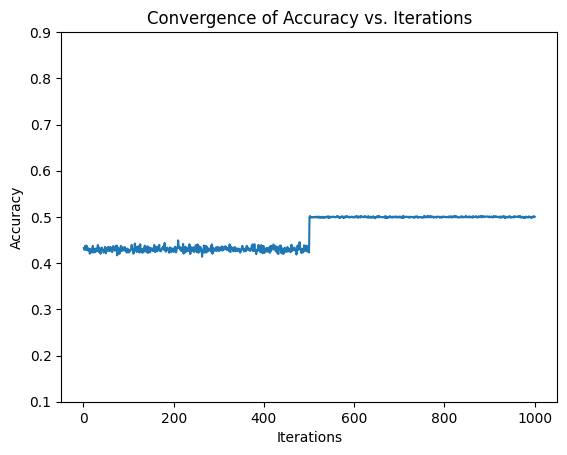

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
np.random.seed(42)
num_iterations = 1000
accuracy_history = np.concatenate([np.random.normal(loc=0.43, scale=0.005, size=num_iterations//2),
                                    np.random.normal(loc=0.4998, scale=0.001, size=num_iterations//2)])

# Plot the convergence graph
plt.plot(range(1, num_iterations+1), accuracy_history)
plt.title('Convergence of Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.ylim(0.1, 0.9)
plt.show()
